Librerías


In [ ]:
#Librería para lectura de archivos de entorno:
import os
from dotenv import load_dotenv

#Librerías para cálculo y gráficas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para la conexión a BBDD:
import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

#Librería para gráficos interactivos en python
import plotly.graph_objects as go
import plotly.express as px

#Librerías dash
from dash import Dash, dcc, html, Input, Output

#Librerías sk-learn para la imputación de review_nulas
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#Para la validación cruzada
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#Para los cálculos estadísticos
from scipy import stats
from scipy.stats import linregress


Comprobación del directorio actual

In [102]:
diractual = os.getcwd()
diractual

'/Users/Edicion/Documents/Estudios/ProjecteIT/ProjecteData/Equip_G/Scripts'

Importación del csv del dataframe de limpieza. Esta semana no disponemos de conexión con MySQL, así que importamos el archivo csv que hemos limpiado en el script general.

In [103]:
df = pd.read_csv(r'../Data/2025_04_28_Sprint03.csv')

In [104]:
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,15248525,"appt dans villa � Llansa ,beau jardin,terrasse",Mon logement est proche de la plage et des com...,84213236,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,66.0,spain,girona,2021-02-27,"air conditioning, balcony, bathroom essentials...",0,0.000000,True,27,"childrenu2019s books and toys, cleaning before..."
1,44391173,Hostal Escadarcs 1780,"Peque�o hostal construido de 1780, situado en ...",358199210,Fontanals de Cerdanya,NaN,Private room,16,0.0,2.0,...,NaN,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",0,0.000000,False,10,"essentials, fire extinguisher, hair dryer, han..."
2,32088176,"Two-level apartment, wifi, terrace, swimming pool","Authentic 2 level apartment, located on the su...",240662122,Lloret de Mar,NaN,Entire home/apt,4,1.0,1.0,...,57.0,spain,girona,2021-02-27,"24-hour check-in, balcony, bathroom essentials...",30,100.000000,True,29,"coffee maker, cooking basics, dedicated worksp..."
3,45803831,Villa Solecito at Illes Balears,Villa Solecito provides a most comfortable and...,345010290,Mah�n,NaN,Entire home/apt,12,6.0,6.0,...,NaN,spain,menorca,2021-02-27,"air conditioning, bathroom essentials, bathroo...",29,96.666667,False,22,"air conditioning, bed linens, cable tv, coffee..."
4,43993521,"Apartment Sant Lluis,2 minutes walk from the b...",Apartments located in the central part of Llor...,59318446,Lloret de Mar,NaN,Entire home/apt,6,1.0,2.0,...,29.0,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",3,10.000000,True,23,"air conditioning, bed linens, carbon monoxide ..."


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9650 non-null   int64  
 1   name                         9647 non-null   object 
 2   description                  9514 non-null   object 
 3   host_id                      9650 non-null   int64  
 4   neighbourhood_name           9650 non-null   object 
 5   neighbourhood_district       5860 non-null   object 
 6   room_type                    9650 non-null   object 
 7   accommodates                 9650 non-null   int64  
 8   bathrooms                    9584 non-null   float64
 9   bedrooms                     9583 non-null   float64
 10  beds                         9605 non-null   float64
 11  amenities_list               9650 non-null   object 
 12  price                        9650 non-null   float64
 13  minimum_nights    

Exploración inicial de los datos asociados a Experiencia del Cliente

In [106]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

,apartment_id,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
count,9.650000e+03,7103,7104,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,9650
unique,NaN,2157,1515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,2018-04-01,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barcelona
freq,NaN,25,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2719
mean,2.122473e+07,NaN,NaN,919.020132,94.429114,93.109954,96.197381,96.172040,95.392088,91.351542,123.703224,NaN
std,1.161793e+07,NaN,NaN,91.419375,9.429369,9.956263,8.212464,8.296275,7.670736,9.935197,153.172140,NaN
min,1.196400e+04,NaN,NaN,200.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,NaN
25%,1.332096e+07,NaN,NaN,890.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,18.000000,NaN
50%,2.065612e+07,NaN,NaN,940.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,58.000000,NaN
75%,3.016933e+07,NaN,NaN,980.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,177.000000,NaN


Cantidad de apartamentos sin reseñas

In [107]:
#Cantidad de apartamentos sin reseñas
sin_reseñas = df['first_review_date'].isna().sum()
print(f"Número de apartamentos sin reseñas: {sin_reseñas}")

#Porcentaje de apartamentos del total
porcentaje_sin_reseñas = (sin_reseñas / len(df)) * 100
print(f"Porcentaje de apartamentos sin reseñas: {porcentaje_sin_reseñas:.2f} %")

Número de apartamentos sin reseñas: 2547
Porcentaje de apartamentos sin reseñas: 26.39 %


In [108]:
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,15248525,"appt dans villa � Llansa ,beau jardin,terrasse",Mon logement est proche de la plage et des com...,84213236,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,66.0,spain,girona,2021-02-27,"air conditioning, balcony, bathroom essentials...",0,0.000000,True,27,"childrenu2019s books and toys, cleaning before..."
1,44391173,Hostal Escadarcs 1780,"Peque�o hostal construido de 1780, situado en ...",358199210,Fontanals de Cerdanya,NaN,Private room,16,0.0,2.0,...,NaN,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",0,0.000000,False,10,"essentials, fire extinguisher, hair dryer, han..."
2,32088176,"Two-level apartment, wifi, terrace, swimming pool","Authentic 2 level apartment, located on the su...",240662122,Lloret de Mar,NaN,Entire home/apt,4,1.0,1.0,...,57.0,spain,girona,2021-02-27,"24-hour check-in, balcony, bathroom essentials...",30,100.000000,True,29,"coffee maker, cooking basics, dedicated worksp..."
3,45803831,Villa Solecito at Illes Balears,Villa Solecito provides a most comfortable and...,345010290,Mah�n,NaN,Entire home/apt,12,6.0,6.0,...,NaN,spain,menorca,2021-02-27,"air conditioning, bathroom essentials, bathroo...",29,96.666667,False,22,"air conditioning, bed linens, cable tv, coffee..."
4,43993521,"Apartment Sant Lluis,2 minutes walk from the b...",Apartments located in the central part of Llor...,59318446,Lloret de Mar,NaN,Entire home/apt,6,1.0,2.0,...,29.0,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",3,10.000000,True,23,"air conditioning, bed linens, carbon monoxide ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,13707226,"Remarkable Value, Unbeatable Location",A spacious double bedroom with a balcony. It's...,80008404,el Barri G�tic,Ciutat Vella,Private room,2,4.0,1.0,...,25.0,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",0,0.000000,True,20,"air conditioning, buzzer/wireless intercom, dr..."
9646,15713525,Nice room in classic eixample flat with balcony,"Lugares de inter�s: Cervecer�a Catalana, Casa ...",3297768,l'Antiga Esquerra de l'Eixample,Eixample,Private room,1,2.0,1.0,...,52.0,spain,barcelona,2017-01-04,"bathroom essentials, bathroom extras, dining a...",30,100.000000,True,18,"breakfast, carbon monoxide detector, dryer, el..."
9647,544995,LUXURY HOUSE IN BCN NEAR THE BEACH,SPECIAL OFFER! LUXURY HOUSE IN BCN NEAR THE BE...,2556699,la Vila Ol�mpica del Poblenou,Sant Mart�,Entire home/apt,6,3.0,3.0,...,39.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",0,0.000000,True,20,"24-hour check-in, air conditioning, buzzer/wir..."
9648,1346199,Duplex Loft near Beach - Groups Offer,Large loft 110m� fully renovated and furnished...,6614322,el Parc i la Llacuna del Poblenou,Sant Mart�,Entire home/apt,10,1.0,2.0,...,NaN,spain,barcelona,2017-01-04,"elevator, family friendly, internet, kitchen, ...",0,0.000000,False,5,"elevator in building, family/kid friendly, kit..."


#### Frecuencia de reseñas al mes por puntuación

<Axes: xlabel='review_scores_value', ylabel='reviews_per_month'>

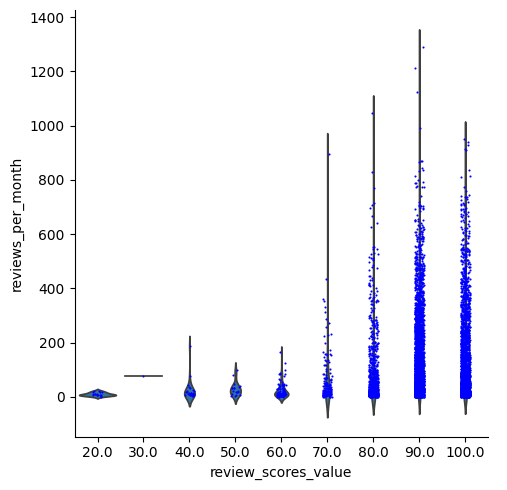

In [109]:
g = sns.catplot(data=df, x='review_scores_value', y='reviews_per_month', kind="violin", inner=None)
sns.stripplot(data=df, x='review_scores_value', y='reviews_per_month', color="b", size=1.5, ax=g.ax)

Text(0.5, 1.0, 'Distribución estadística del rating total por ciudad')

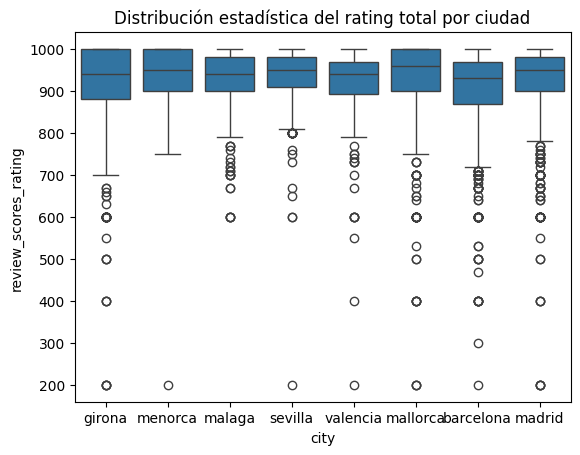

In [110]:
ax = sns.boxplot(data=df, x='city', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por ciudad")

Text(0.5, 1.0, 'Distribución estadística del rating total por tipo de alojamiento')

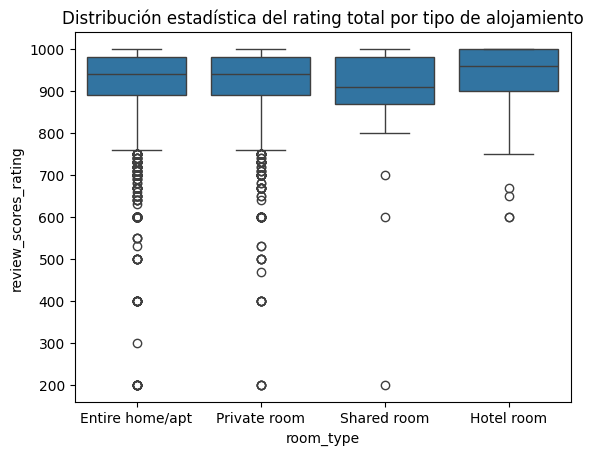

In [111]:
ax = sns.boxplot(data=df, x='room_type', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por tipo de alojamiento")

## KPI 3 - Índice de satisfacción general

A partir de esta semana, el índice se calcular en función de review_scores_rating en vez de 'review_scores_value'.  

El índice en la semana 2 fue de 71.67 con respecto a value; respecto a review, el valor habría sido: 72.28

In [112]:
Indice_satisfaccion_general = df['review_scores_rating'].sum() / df['apartment_id'].count() / 10

print(f'El índice de satisfacción general es: {Indice_satisfaccion_general:.2f}')

El índice de satisfacción general es: 67.65


In [113]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = Indice_satisfaccion_general,
    title = {'text': "Índice de satisfacción general"},
    delta = {'reference': 72.28,
             'valueformat': '.2f'},
    gauge= {'axis': {'visible': False}},
    number={'valueformat': '.2f'}
))

fig.show()

## KPI 4 - Ítem con la mayor puntuación promedio

In [114]:
# Diccionario para traducir los nombres de las columnas de evaluación específicas
traducciones = {
    'review_scores_accuracy': 'Precisión',
    'review_scores_cleanliness': 'Limpieza',
    'review_scores_checkin': 'Entrada',
    'review_scores_communication': 'Comunicaciones',
    'review_scores_location': 'Ubicación'
}

# Columnas originales
cols = list(traducciones.keys())

# Calcular la media de cada una (ignorando NaN)
mean_scores = df[cols].mean().rename(traducciones)

print(mean_scores)

# Mostrar la métrica con mayor media
max_metric = mean_scores.idxmax()
max_value = mean_scores.max()

print(f"La métrica con la mayor puntuación promedio es: {max_metric} con un valor de {max_value:.2f}")

Precisión         94.429114
Limpieza          93.109954
Entrada           96.197381
Comunicaciones    96.172040
Ubicación         95.392088
dtype: float64
La métrica con la mayor puntuación promedio es: Entrada con un valor de 96.20


Representación gráfica

[Text(0, 0, '93.11'),
 Text(0, 0, '94.43'),
 Text(0, 0, '95.39'),
 Text(0, 0, '96.17'),
 Text(0, 0, '96.20')]

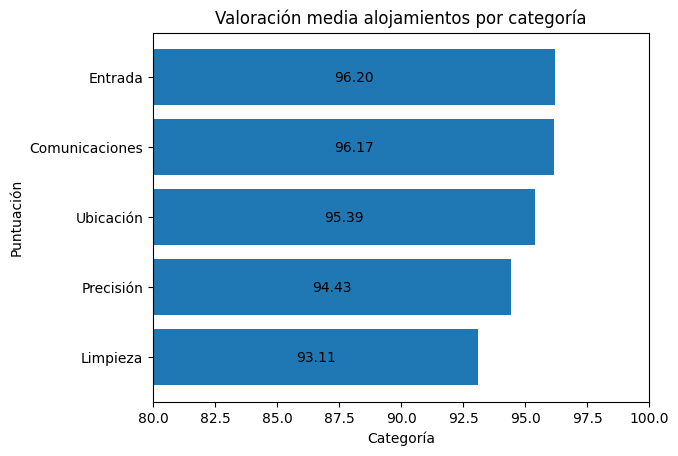

In [115]:
mean_sorted = mean_scores.sort_values(ascending=True)
plt.barh(mean_sorted.index, mean_sorted.values)
plt.xlim(80, 100)
plt.xlabel('Categoría')
plt.ylabel('Puntuación')
plt.title('Valoración media alojamientos por categoría')
plt.bar_label(plt.gca().containers[0], fmt='%.2f', label_type='center')

Gráfica de radar para representar las puntuaciones

In [116]:
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=mean_scores.values, theta=mean_scores.index, range_r=(90, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=mean_scores.values,
    theta=mean_scores.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=mean_scores.values.round(2),
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_value],
    theta=[max_metric],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

### Respuestas de negocio

#### Sprint 01

Puntuación media de los usuarios

In [117]:
media_valor = df['review_scores_value'].mean()
print(f"Puntuación media otorgada por los usuarios: {media_valor:.2f}")

Puntuación media otorgada por los usuarios: 91.35


In [118]:
fig = go.Figure(go.Indicator(
    mode = "number+gauge",
    gauge = {'shape': "bullet", 
             'axis': {'visible': False}},
    delta = {'reference': 100}, #Aunque la referencia no es necesaria si no ponemos el tope
    value = media_valor,
    domain = {'x': [0.2, 1], 'y': [0.2, 0.9]},
    title = {'text': "Puntuación media general",
             'align': 'right'},
    number= {'valueformat': '.2f'}))

fig.show()

 Porcentaje de alojamientos por ciudad que superan una puntuación de 80

In [119]:

# Crear una columna booleana para marcar los que superan 80
df['supera_80'] = df['review_scores_value'] > 80

# Agrupar por ciudad y calcular el porcentaje
porcentaje_por_ciudad = (
    df.groupby('city')['supera_80']
    .mean().sort_values(ascending=False) * 100
).round(2)

print(pd.DataFrame(porcentaje_por_ciudad))


           supera_80
city                
sevilla        79.35
valencia       73.10
malaga         70.44
madrid         67.01
barcelona      62.04
menorca        52.29
mallorca       51.42
girona         48.01


In [120]:
porcentaje_por_ciudad.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, sevilla to girona
Series name: supera_80
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


In [121]:
porcentaje_por_ciudad = pd.DataFrame(porcentaje_por_ciudad)
porcentaje_por_ciudad.info()
                                     

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sevilla to girona
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   supera_80  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_2255/1923502712.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




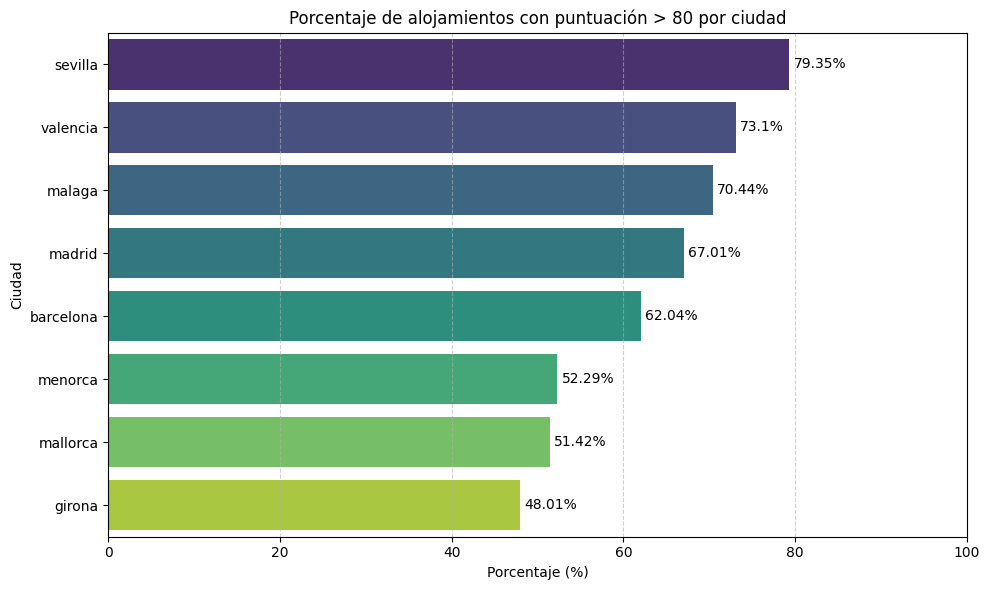

In [122]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentaje_por_ciudad, x='supera_80', y='city', palette='viridis')

# Anotar porcentajes
for index, row in porcentaje_por_ciudad.iterrows():
    plt.text(row['supera_80'] + 0.5, index, f"{row['supera_80']}%", va='center')

# Ajustes visuales
plt.title('Porcentaje de alojamientos con puntuación > 80 por ciudad')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Ciudad')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Sprint 02

¿Qué aspectos (precisión, higiene, registro o comunicaciones) presentan mayores diferencias entre los alojamientos mejor y peor valorados en la evaluación general? 

In [123]:
cols.remove('review_scores_location')
print(cols)

['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']


In [124]:
# Eliminar filas con valores nulos en estas columnas y en la puntuación global
df_clean = df.dropna(subset=cols + ['review_scores_value'])

df_clean

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,15248525,"appt dans villa � Llansa ,beau jardin,terrasse",Mon logement est proche de la plage et des com...,84213236,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,66.0,spain,girona,2021-02-27,"air conditioning, balcony, bathroom essentials...",0,0.000000,True,27,"childrenu2019s books and toys, cleaning before..."
2,32088176,"Two-level apartment, wifi, terrace, swimming pool","Authentic 2 level apartment, located on the su...",240662122,Lloret de Mar,NaN,Entire home/apt,4,1.0,1.0,...,57.0,spain,girona,2021-02-27,"24-hour check-in, balcony, bathroom essentials...",30,100.000000,True,29,"coffee maker, cooking basics, dedicated worksp..."
4,43993521,"Apartment Sant Lluis,2 minutes walk from the b...",Apartments located in the central part of Llor...,59318446,Lloret de Mar,NaN,Entire home/apt,6,1.0,2.0,...,29.0,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",3,10.000000,True,23,"air conditioning, bed linens, carbon monoxide ..."
6,1160633,Attic close Llan�� Beach. Wifi,Beautiful penthouse in the center of Port de L...,2816160,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,28.0,spain,girona,2021-02-27,"24-hour check-in, baby essentials, balcony, ba...",30,100.000000,True,24,"bed linens, coffee maker, cooking basics, dish..."
9,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,3.0,...,101.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, balcony, b...",1,3.333333,True,31,"beachfront, bed linens, building staff, childr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,11411444,Cute apartment close to Pg.Gr�cia a,Cute apartment in Gracia! near Metro Diagonal...,14368366,la Vila de Gr�cia,Gr�cia,Entire home/apt,2,1.0,1.0,...,147.0,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",1,3.333333,True,11,"air conditioning, dryer, essentials, family/ki..."
9645,13707226,"Remarkable Value, Unbeatable Location",A spacious double bedroom with a balcony. It's...,80008404,el Barri G�tic,Ciutat Vella,Private room,2,4.0,1.0,...,25.0,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",0,0.000000,True,20,"air conditioning, buzzer/wireless intercom, dr..."
9646,15713525,Nice room in classic eixample flat with balcony,"Lugares de inter�s: Cervecer�a Catalana, Casa ...",3297768,l'Antiga Esquerra de l'Eixample,Eixample,Private room,1,2.0,1.0,...,52.0,spain,barcelona,2017-01-04,"bathroom essentials, bathroom extras, dining a...",30,100.000000,True,18,"breakfast, carbon monoxide detector, dryer, el..."
9647,544995,LUXURY HOUSE IN BCN NEAR THE BEACH,SPECIAL OFFER! LUXURY HOUSE IN BCN NEAR THE BE...,2556699,la Vila Ol�mpica del Poblenou,Sant Mart�,Entire home/apt,6,3.0,3.0,...,39.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",0,0.000000,True,20,"24-hour check-in, air conditioning, buzzer/wir..."


In [125]:
df_mediana = df_clean.groupby('review_scores_value')[cols].median().reset_index()
df_mediana

,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
0,20.0,20.0,20.0,60.0,60.0
1,30.0,50.0,80.0,40.0,50.0
2,40.0,60.0,60.0,80.0,80.0
3,50.0,70.0,60.0,80.0,80.0
4,60.0,80.0,80.0,90.0,80.0
5,70.0,80.0,80.0,90.0,80.0
6,80.0,90.0,90.0,90.0,90.0
7,90.0,100.0,90.0,100.0,100.0
8,100.0,100.0,100.0,100.0,100.0


In [126]:
max_review_value = df_mediana['review_scores_value'].max()
print(max_review_value)

100.0


In [127]:
min_review_value = df_mediana['review_scores_value'].min()
print(min_review_value)

20.0


In [128]:


# Identificar el alojamiento mejor y peor valorado
mejor = df_mediana.loc[df_mediana['review_scores_value'].idxmax()]
peor = df_mediana.loc[df_mediana['review_scores_value'].idxmin()]

print(mejor)
print(peor)


review_scores_value            100.0
review_scores_accuracy         100.0
review_scores_cleanliness      100.0
review_scores_checkin          100.0
review_scores_communication    100.0
Name: 8, dtype: float64
review_scores_value            20.0
review_scores_accuracy         20.0
review_scores_cleanliness      20.0
review_scores_checkin          60.0
review_scores_communication    60.0
Name: 0, dtype: float64


In [129]:

# Calcular diferencias
diferencias = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)

print(diferencias)


Entrada           40.0
Comunicaciones    40.0
Precisión         80.0
Limpieza          80.0
dtype: float64


El aspecto con la valoración más dispar es: Precisión con una diferencia de 80.00 puntos


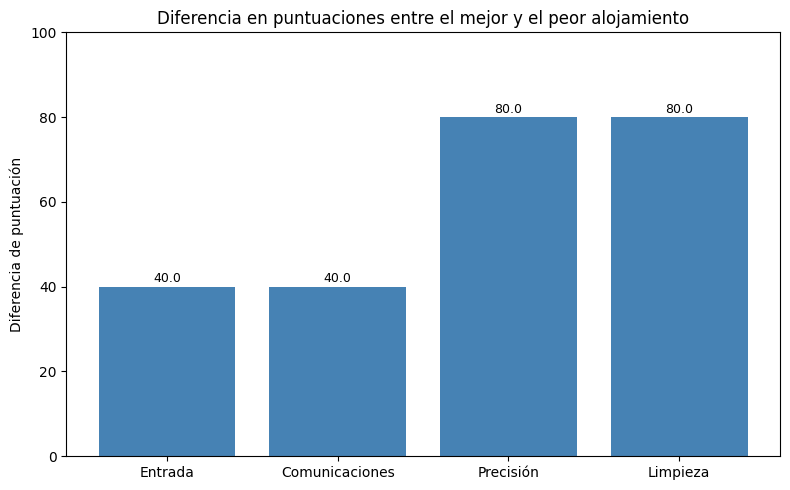

In [130]:

max_item = diferencias.idxmax()
max_diferencia = diferencias.max()

print(f"El aspecto con la valoración más dispar es: {max_item} con una diferencia de {max_diferencia:.2f} puntos")

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(diferencias.index, diferencias.values, color='steelblue')
plt.title('Diferencia en puntuaciones entre el mejor y el peor alojamiento', fontsize=12)
plt.ylabel('Diferencia de puntuación')
plt.ylim(0, 100)

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()


In [131]:
# Gráfica de radar plotly
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=diferencias.values, theta=diferencias.index, range_r=(0, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=diferencias.values,
    theta=diferencias.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=diferencias.values,
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_diferencia],
    theta=[max_item],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

Segmentamos por ciudad

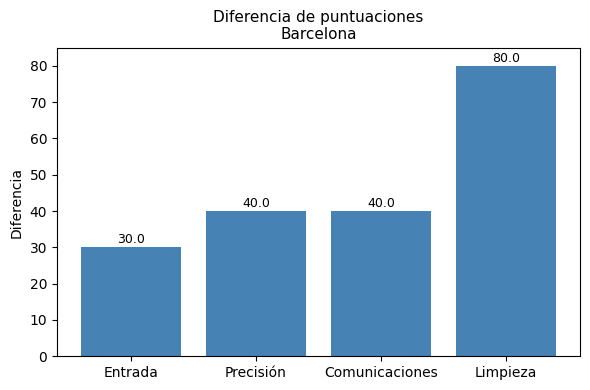

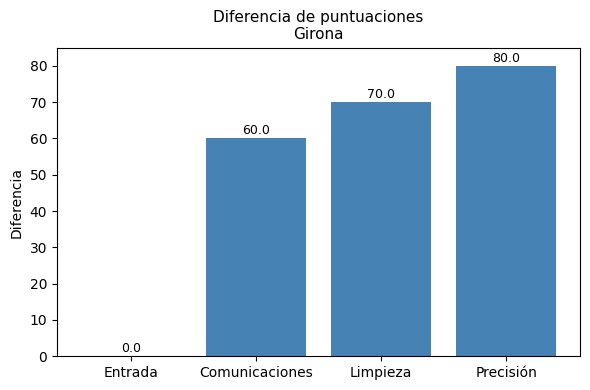

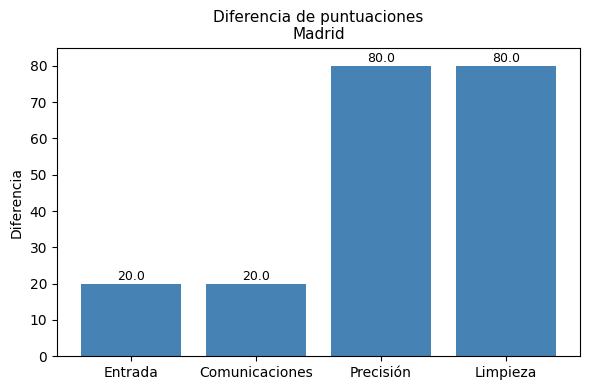

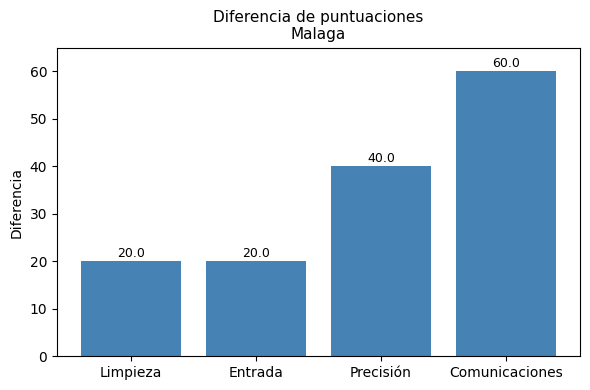

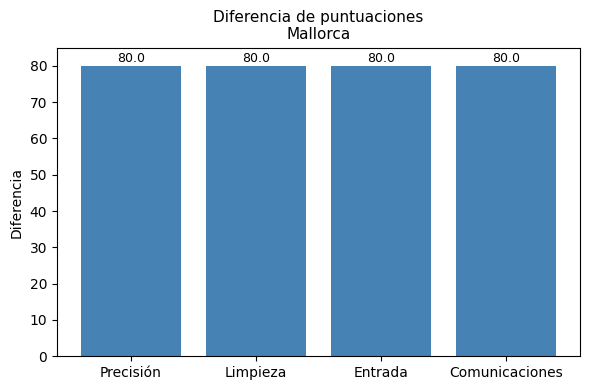

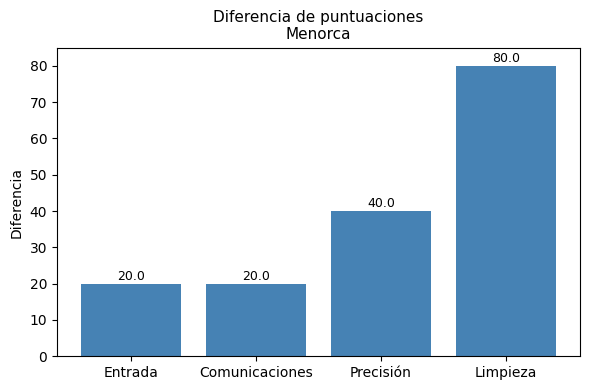

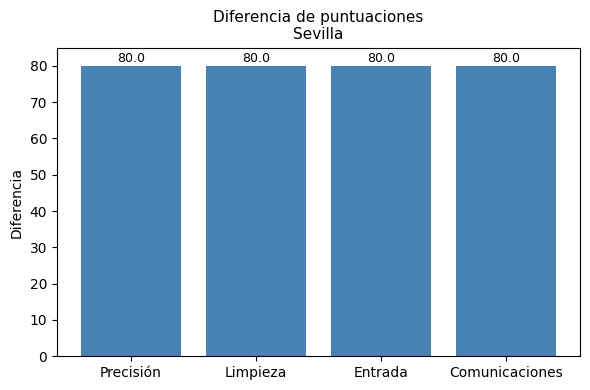

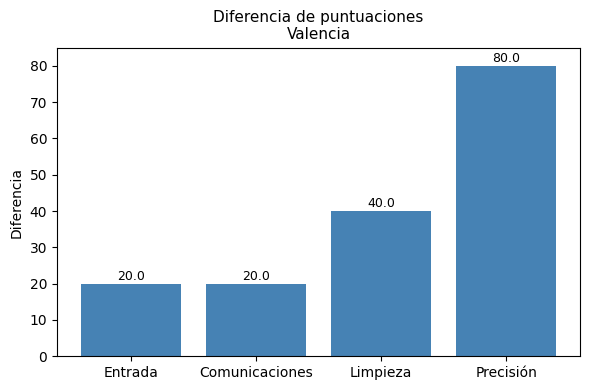

In [132]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'city'])

# Agrupar solo por ciudad
grouped = df_clean.groupby('city')

# Crear gráfico por ciudad
for city, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{city.capitalize()}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()


In [133]:
# Para cada ciudad, generar un gráfico de radar
for city, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])
    
    # Datos para resaltar el valor máximo
    max_item = diferencias.idxmax().replace('review_scores_', '').capitalize()
    max_diferencia = diferencias.max()

    # Convertir índices para visualización
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()

    # Crear figura polar (radar)
    fig = px.line_polar(
        r=diferencias.values,
        theta=theta_labels,
        range_r=(0, max(diferencias.values) + 5),
        line_close=True,
        title=f"Diferencia de puntuaciones entre el mejor y peor alojamiento en {city}"
    )
    fig.update_traces(fill='toself')

    # Añadir puntos y valores
    fig.add_trace(go.Scatterpolar(
        r=diferencias.values,
        theta=theta_labels,
        mode='markers+text',
        marker=dict(color='blue', size=5, symbol='circle'),
        text=[f'{v:.1f}' for v in diferencias.values],
        textposition='top center',
        name='Valores',
        showlegend=False
    ))

    # Marcar el valor máximo
    fig.add_trace(go.Scatterpolar(
        r=[max_diferencia],
        theta=[max_item],
        mode='markers',
        marker=dict(color='red', size=10, symbol='circle'),
        name='Valor máximo',
        showlegend=False
    ))

    fig.show()

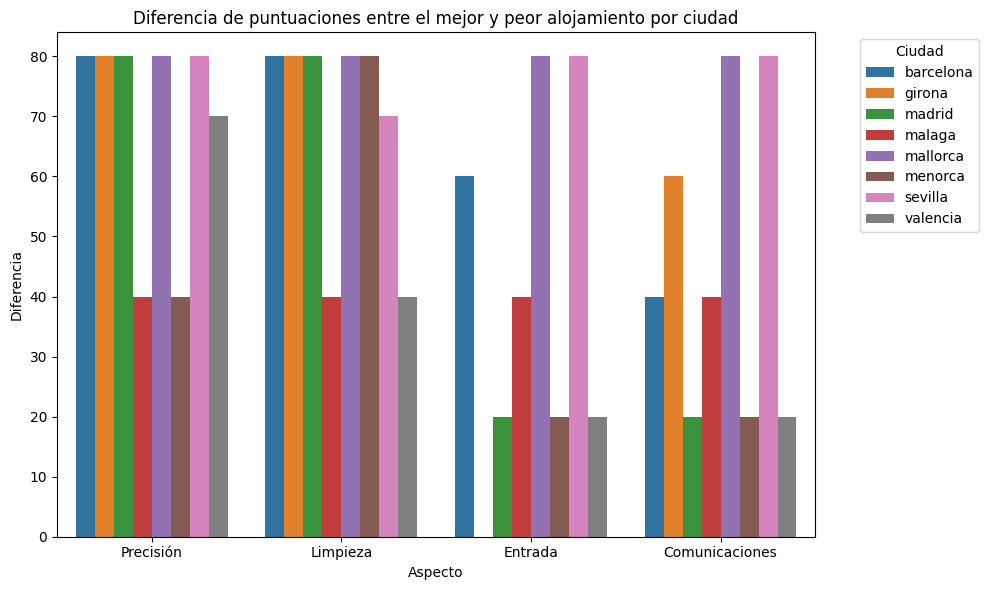

In [134]:
#Gráfica de barras apilada

#Agrupar por ciudad y calcular diferencias
records = []
for city, group in df_clean.groupby('city'):
    mejor = group.loc[group['review_scores_rating'].idxmax()]
    peor = group.loc[group['review_scores_rating'].idxmin()]
    diferencias = (mejor[cols] - peor[cols]).rename(traducciones)
    for aspecto, valor in diferencias.items():
        records.append({
            'Ciudad': city,
            'Aspecto': aspecto,
            'Diferencia': valor
        })

# Crear DataFrame en formato largo
long_df = pd.DataFrame(records)

# Crear gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Aspecto', y='Diferencia', hue='Ciudad')

# Ajustes estéticos
plt.title("Diferencia de puntuaciones entre el mejor y peor alojamiento por ciudad")
plt.ylabel("Diferencia")
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Segmentamos por tipo de alojamiento

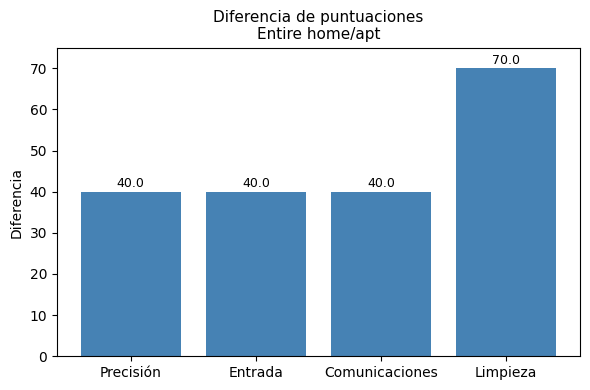

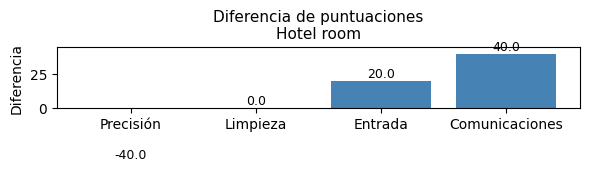

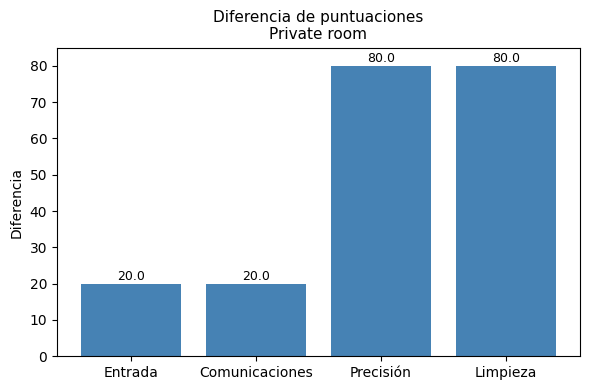

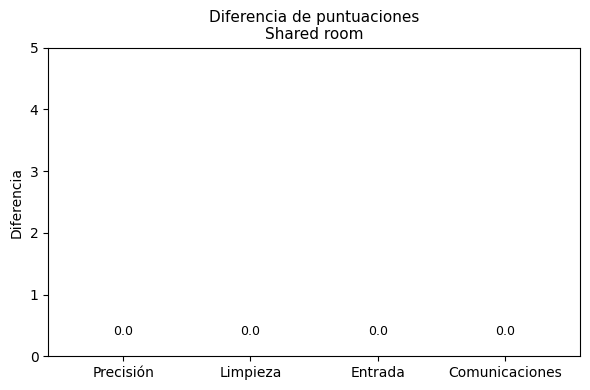

In [135]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'room_type'])

# Agrupar solo por tipo de alojamiento
grouped = df_clean.groupby('room_type')

# Crear gráfico por tipo de alojamiento
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{room_type.capitalize()}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

In [136]:
# Todos los trazos en el mismo gráfico de radas
# Inicializar figura
fig = go.Figure()

# Añadir una traza por tipo de alojamiento
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])

    # Etiquetas más limpias
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()
    r_values = diferencias.values

    fig.add_trace(go.Scatterpolar(
        r=r_values,
        theta=theta_labels,
        fill='toself',
        name=room_type,
        mode='lines+markers',
        opacity=0.6  # Mejora la legibilidad al superponer
    ))

# Configuración del gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_clean[cols].max().max()]
        )
    ),
    title="Comparativa de diferencias de puntuaciones entre el mejor y peor alojamiento por tipo de alojamiento",
    showlegend=True
)

fig.show()


#### Sprint 03

¿Existe una relación entre el precio del alojamiento y la satisfacción general de los clientes? ¿Cómo varía esta relación en función de las diferentes ciudades donde se ubican los alojamientos?

Nuestra hipótesis nula será que no existe relación entre estas dos medidas.  
En caso de que observemos que hay relación, aunque sea débil, rechazaremos la hipótesis nula y concluiremos que existe correlación.

Text(0.5, 1.0, 'Relación entre valoración general y precio del alojamiento')

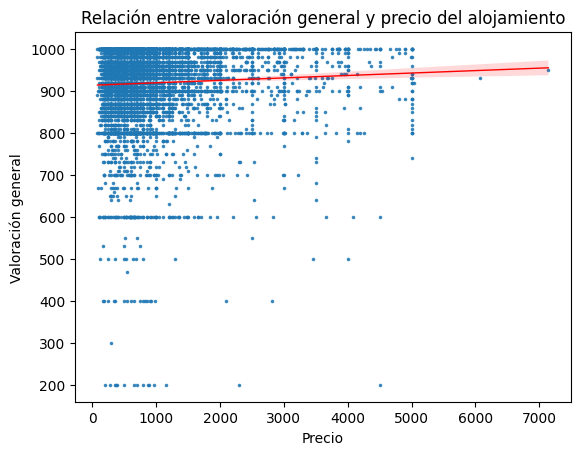

In [137]:
# Visualizar el diagrama de dispersión con la recta de regresión
sns.regplot(data=df, x='price', y='review_scores_rating', scatter_kws={'s': 2.5}, line_kws={'linewidth': 1, 'color': 'red'})

plt.xlabel("Precio")
plt.ylabel("Valoración general")
plt.title("Relación entre valoración general y precio del alojamiento")


Podemos percibir que se acostumbra a valorar positivamente los alojamientos y que las valoraciones más bajas se acostumbran a dar en alojamientos más baratos,  
pero los registros parecen apelotonarse en el cuadrante superior de forma aleatoria. ¿Existe una tendencia, aunque sea débil?  
¿El precio implica una calidad que revierta en una mejor experiencia del cliente y, por tanto, una puntuación mayor?  
¿O que los alojamientos más baratos acostumbran a tener peores puntuaciones?  
La recta de regresión nos proporciona una pendiente muy leve.
Vamos a calcular los coeficientes de Pearson (para correlaciones lineales) y Spearman (para correlaciones monótonas no necesariamente lineales) para comprobarlo.

##### Test de hipótesis:

Hipótesis cero: No hay correlación entre precio del alojamiento y puntuación general.  
En caso de que el valor p sea < 0,05 podemos deducir que hay relación, aunque esta sea débil.

Usaremos el dataframe limpio que excluye los alojamientos sin reseña.

In [138]:
# Test de correlación de Pearson para comprobar si existe una relación lineal entre precio y valoración
pearson_corr, pearson_p = stats.pearsonr(df_clean['price'], df_clean['review_scores_rating'])

# Test de correlación de Sparman como complemento del test de correlación de Pearson
# En caso de que no exista una correlación lineal pero sí otro modo de correlación
spearman_corr, spearman_p = stats.spearmanr(df_clean['price'], df_clean['review_scores_rating'])

print('Test de hipótesis global: correlación entre precio y valoración general del alojamiento')
print('-' * 50)
print('\
Test de correlación de Pearson:')
print('Coeficiente de correlación: ' + str(round(pearson_corr, 4)))
print('Valor p: ' + str(round(pearson_p, 10)))

print('\
Test de correlación de Spearman:')
print('Coeficiente de correlación: ' + str(round(spearman_corr, 4)))
print('Valor p: ' + str(round(spearman_p, 10)))

# Analizamos por ciudad
print('\
Análisis por ciudad:')
print('-' * 50)


Test de hipótesis global: correlación entre precio y valoración general del alojamiento
--------------------------------------------------
Test de correlación de Pearson:
Coeficiente de correlación: 0.0513
Valor p: 1.54406e-05
Test de correlación de Spearman:
Coeficiente de correlación: 0.0969
Valor p: 0.0
Análisis por ciudad:
--------------------------------------------------


El valor p del test de Pearson nos indica que, en general, hay una correlación, aunque débil, entre el precio del alojamiento y la evaluación de los clientes.  
Si aplicamos el test de Spearman, esta correlación es más nítida, indicándonos que existe una relación no lineal, aunque también débil, entre ambos parámetros.

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_2255/4037077423.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



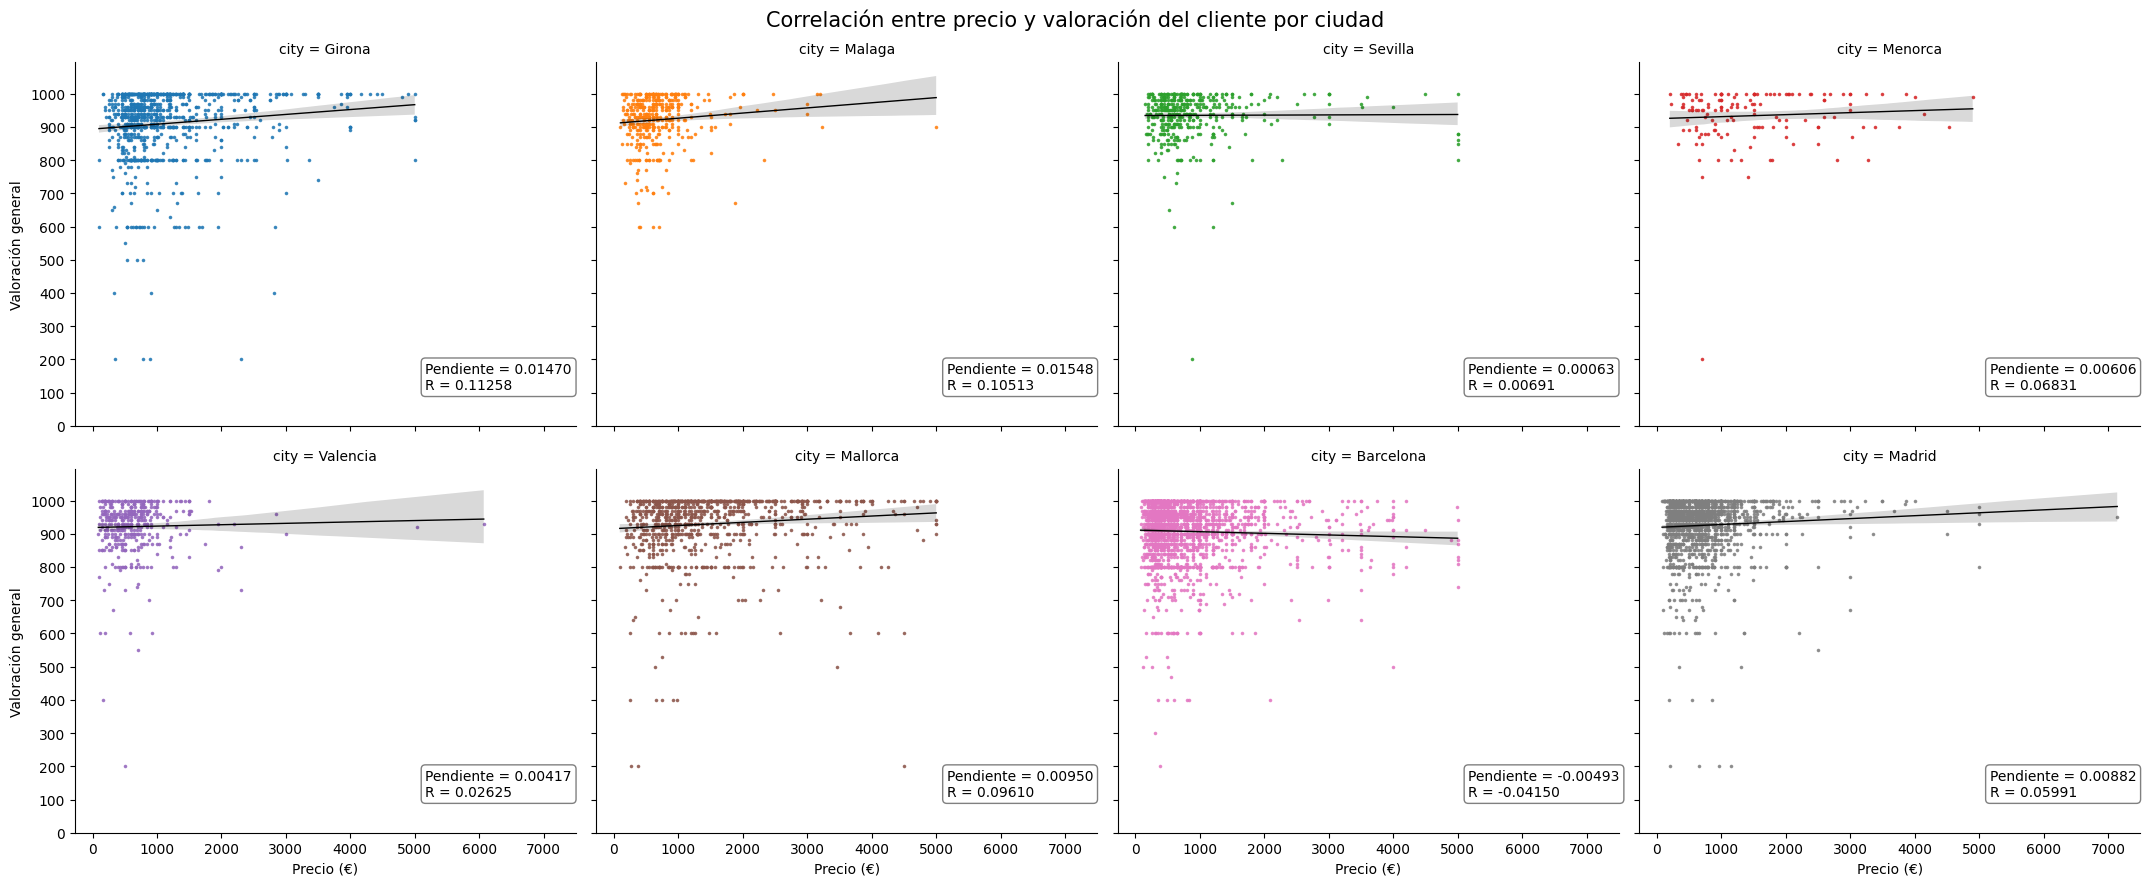

In [139]:
df_clean['city'] = df_clean['city'].str.title()

# Vamos a representar estos resultados por ciudad y analizamos
g = sns.lmplot(data=df_clean, x='price', y='review_scores_rating', col='city', hue='city', facet_kws={'sharex': True},
               col_wrap=4, height=4.5, aspect=1.2, scatter_kws={'s':2.5}, line_kws={'linewidth': 1, 'color': 'black'})
g.set(yticks=range(0, 1001, 100)) 

# Añadir pendiente y r en cada subplot
for ax, city in zip(g.axes.flatten(), df_clean['city'].unique()):
    subset = df_clean[df_clean['city'] == city]
    slope, intercept, r_value, p_value, std_err = linregress(subset['price'], subset['review_scores_rating'])
    ax.text(0.7, 0.175,
            f"Pendiente = {slope:.5f}\nR = {r_value:.5f}",
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))
    
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Correlación entre precio y valoración del cliente por ciudad', fontsize=15)
g.set_axis_labels('Precio (€)', 'Valoración general')
g.tight_layout()

In [140]:
cities = df_clean['city'].unique()

print('Test de hipótesis global: correlación entre precio y valoración general \ndel alojamiento desglosado por ciudad')
print('-' * 50)
for city in cities:
    city_data = df_clean[df_clean['city'] == city]

    # Pearson correlation test for this city
    pearson_corr_city, pearson_p_city = stats.pearsonr(city_data['price'], city_data['review_scores_rating'])
    
    # Spearman correlation test for this city
    spearman_corr_city, spearman_p_city = stats.spearmanr(city_data['price'], city_data['review_scores_rating'])
        
    print('\
    City: ' + city.capitalize())
    print(' Correlación Pearson: ' + str(round(pearson_corr_city, 4)) + ' (valor p: ' + str(round(pearson_p_city, 10)) + ')')
    print(' Correlación Spearman: ' + str(round(spearman_corr_city, 4)) + ' (valor p: ' + str(round(spearman_p_city, 10)) + ')')


Test de hipótesis global: correlación entre precio y valoración general 
del alojamiento desglosado por ciudad
--------------------------------------------------
    City: Girona
 Correlación Pearson: 0.1126 (valor p: 0.0005949706)
 Correlación Spearman: 0.1719 (valor p: 1.388e-07)
    City: Malaga
 Correlación Pearson: 0.1051 (valor p: 0.0318522852)
 Correlación Spearman: 0.1617 (valor p: 0.0009186565)
    City: Sevilla
 Correlación Pearson: 0.0069 (valor p: 0.8863742095)
 Correlación Spearman: 0.074 (valor p: 0.1256751595)
    City: Menorca
 Correlación Pearson: 0.0683 (valor p: 0.4110243189)
 Correlación Spearman: 0.0605 (valor p: 0.4668755185)
    City: Valencia
 Correlación Pearson: 0.0262 (valor p: 0.5855613807)
 Correlación Spearman: 0.0756 (valor p: 0.1156704934)
    City: Mallorca
 Correlación Pearson: 0.0961 (valor p: 0.0025226462)
 Correlación Spearman: 0.2142 (valor p: 0.0)
    City: Barcelona
 Correlación Pearson: -0.0415 (valor p: 0.0572150875)
 Correlación Spearman: -0.0

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_2255/1461309271.py:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



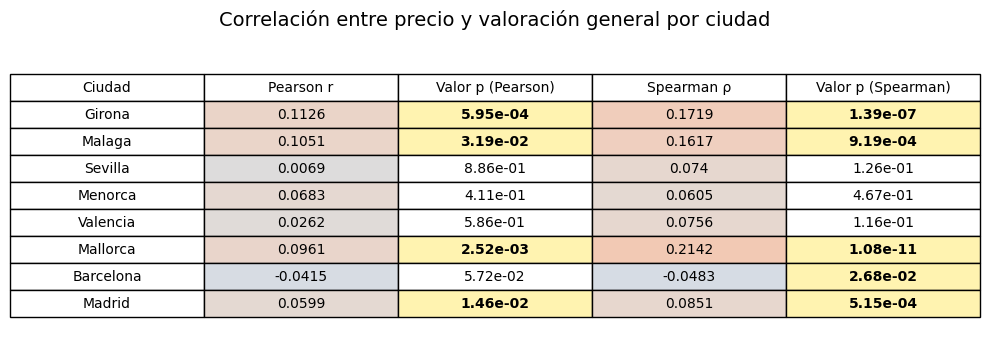

In [153]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Calcular valores
rows = []
for city in df_clean['city'].unique():
    city_data = df_clean[df_clean['city'] == city]
    pearson_corr, pearson_p = stats.pearsonr(city_data['price'], city_data['review_scores_rating'])
    spearman_corr, spearman_p = stats.spearmanr(city_data['price'], city_data['review_scores_rating'])

    rows.append({
        'Ciudad': city.title(),
        'Pearson r': round(pearson_corr, 4),
        'Valor p (Pearson)': pearson_p,
        'Spearman ρ': round(spearman_corr, 4),
        'Valor p (Spearman)': spearman_p
    })

# Crear DataFrame
df = pd.DataFrame(rows)

# Convertir valores p a notación científica para visualización
df['Valor p (Pearson) text'] = df['Valor p (Pearson)'].apply(lambda p: f"{p:.2e}")
df['Valor p (Spearman) text'] = df['Valor p (Spearman)'].apply(lambda p: f"{p:.2e}")

# Tabla final a mostrar
table_data = df[['Ciudad', 'Pearson r', 'Valor p (Pearson) text', 'Spearman ρ', 'Valor p (Spearman) text']].values
col_labels = ['Ciudad', 'Pearson r', 'Valor p (Pearson)', 'Spearman ρ', 'Valor p (Spearman)']

# Configurar colores
norm = mcolors.Normalize(vmin=-1, vmax=1)
cmap = cm.get_cmap('coolwarm')

# Crear figura
fig, ax = plt.subplots(figsize=(10, 0.5 + 0.4 * len(df)))
ax.axis('off')

# Crear tabla
tabla = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 1.5)

# Aplicar estilos
for i in range(len(df)):
    for j, col in enumerate(col_labels):
        cell = tabla[(i+1, j)]

        # Colorear celdas de correlación
        if col in ['Pearson r', 'Spearman ρ']:
            value = df.iloc[i][col]
            color = cmap(norm(value))
            cell.set_facecolor(color)

        # Resaltar p < 0.05
        if col == 'Valor p (Pearson)' and df.iloc[i]['Valor p (Pearson)'] < 0.05:
            cell.set_facecolor('#fff3b0')  # amarillo claro
            cell.get_text().set_weight('bold')

        if col == 'Valor p (Spearman)' and df.iloc[i]['Valor p (Spearman)'] < 0.05:
            cell.set_facecolor('#fff3b0')
            cell.get_text().set_weight('bold')

# Título
plt.title("Correlación entre precio y valoración general por ciudad", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


Vemos que la relación entre ambos valores varía entre ciudades. El valor p tanto para el test de Pearson como para el de Spearman  
nos indica que no podemos hablar de correlación en lugares como Sevilla, Menorca, Valencia y apenas existente en Madrid. En Barcelona la correlación,    
aunque débil, es negativa. Cabe destacar que no es lineal, sino que parece existir otro tipo de relación modal.   
Podemos afirmar que en Girona, Málaga y Mallorca sí que existe relación significativa, débil pero positiva, y no lineal. 

#### Simulación de resultados con librería sklearn

Usamos entrenamiento de machine learning con parte de los datos para entrenar y predecir los resultados de valoración general con relación al precio   
para tres tipos de regresión: lineal, Ridge y Lasso.

Linear Regression Resultados:
Error cuadrático medio: 9002.0117
Coeficiente R cuadrado: 0.0003
--------------------------------------------------


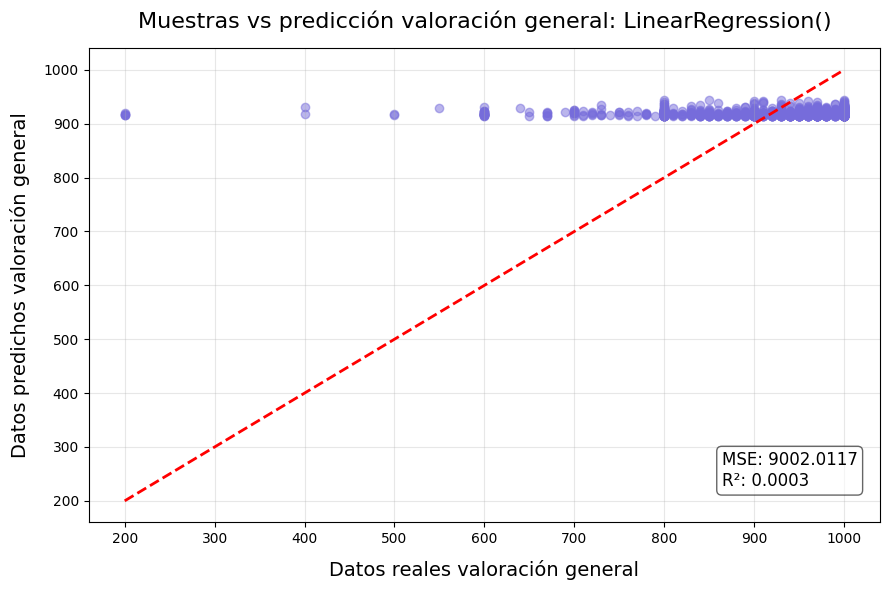

Ridge Regression Resultados:
Error cuadrático medio: 9002.0081
Coeficiente R cuadrado: 0.0003
--------------------------------------------------


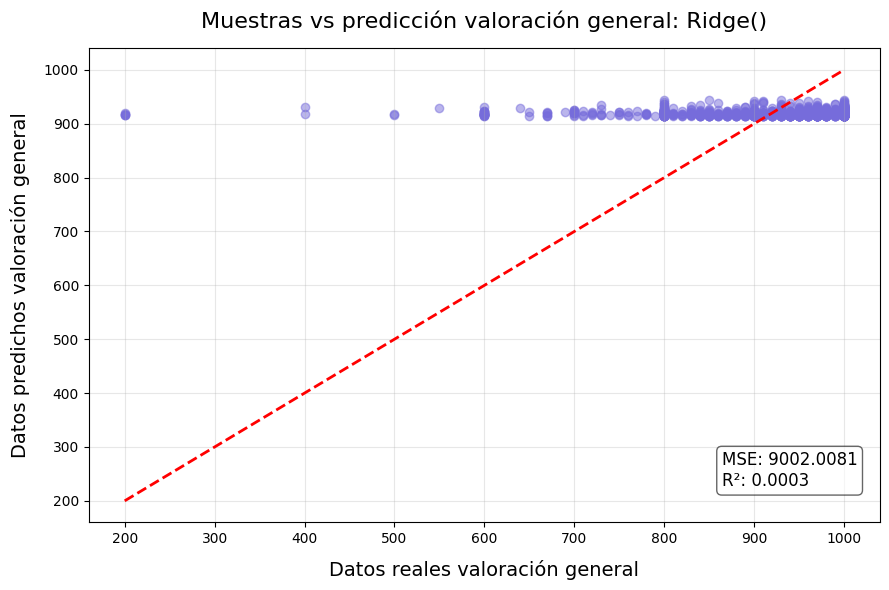

Lasso Regression Resultados:
Error cuadrático medio: 8998.9922
Coeficiente R cuadrado: 0.0006
--------------------------------------------------


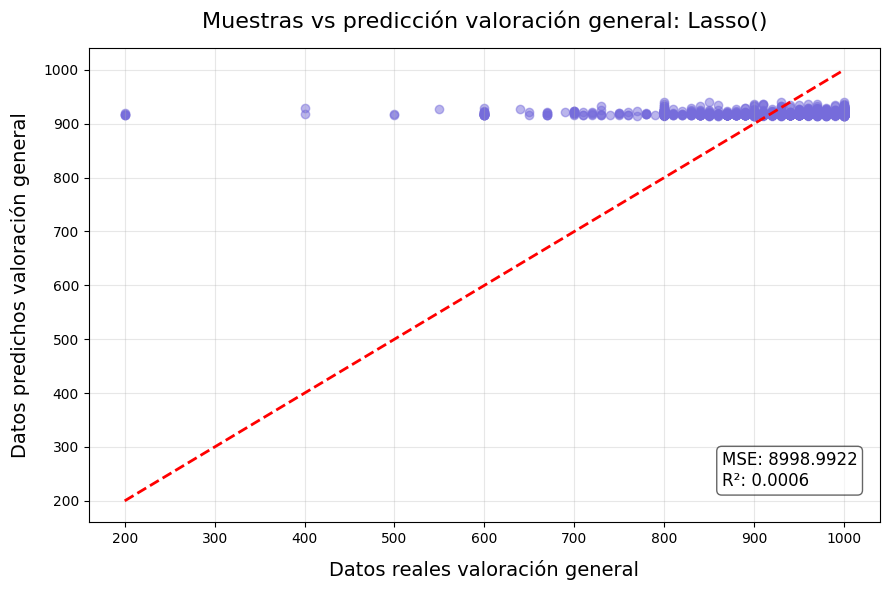

In [ ]:
# Preparación de los datos (eliminando valores vacíos)
X = df_clean[['price']].values
y = df_clean['review_scores_rating'].values

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento en múltiples modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

# Entrenamos y evaluamos cada modelo
results = {}
for name, model in models.items():
    # Entrenamiento
    model.fit(X_train_scaled, y_train)
    
    # Predicción
    y_pred = model.predict(X_test_scaled)
    
    # Cálculo de métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'mse': mse,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(name + ' Resultados:')
    print('Error cuadrático medio: ' + str(round(mse, 4)))
    print('Coeficiente R cuadrado: ' + str(round(r2, 4)))
    print('-' * 50)

    # Visualize actual vs predicted
    plt.figure(figsize=(9, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='#766CDB')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Datos reales valoración general', fontsize=14, labelpad=10)
    plt.ylabel('Datos predichos valoración general', fontsize=14, labelpad=10)
    plt.title(f'Muestras vs predicción valoración general: {model}', fontsize=16, pad=15)

    # ✅ Mostrar R² y MSE dentro del gráfico
    textstr = f"MSE: {mse:.4f}\nR²: {r2:.4f}"
    plt.text(
    0.8, 0.15, textstr,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.6)
    )

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Running 5-fold cross validation on multiple models...
Random Forest Cross-Validation Results:
Mean R2 Score: -0.0672
Std R2 Score: 0.0166
--------------------------------------------------
Gradient Boosting Cross-Validation Results:
Mean R2 Score: -0.01
Std R2 Score: 0.0034
--------------------------------------------------
SVR Cross-Validation Results:
Mean R2 Score: -0.0545
Std R2 Score: 0.0213
--------------------------------------------------
Random Forest Final Results:
Test Set R2 Score: -0.0569
Test Set MSE: 9516.7978


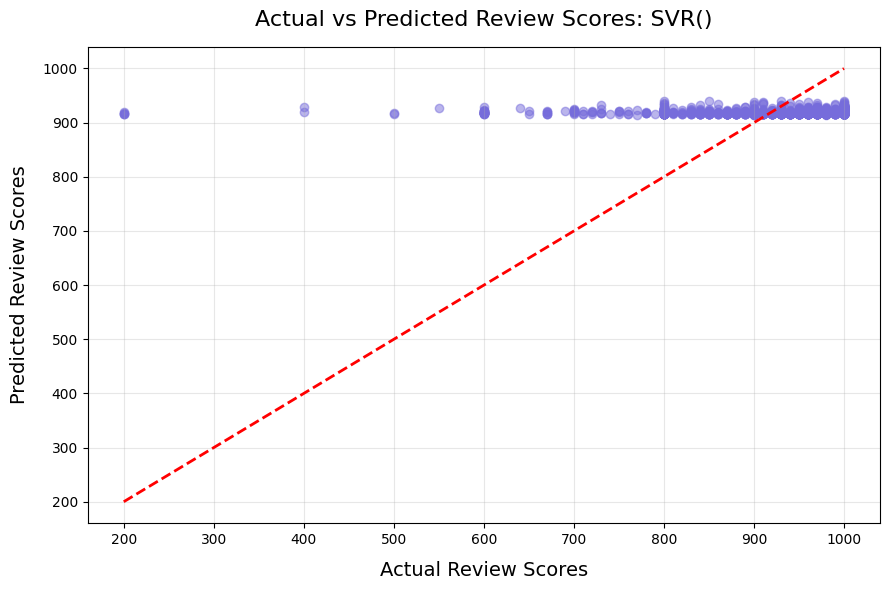

In [143]:
# Import additional models and metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

# Prepare the data (using the same scaled data from before)
print('Running 5-fold cross validation on multiple models...\
')

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(name + ' Cross-Validation Results:')
    print('Mean R2 Score: ' + str(round(np.mean(scores), 4)))
    print('Std R2 Score: ' + str(round(np.std(scores), 4)))
    print('-' * 50)

# Train Random Forest (best performing model) and analyze feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

print('\
Random Forest Final Results:')
print('Test Set R2 Score: ' + str(round(r2_score(y_test, rf_predictions), 4)))
print('Test Set MSE: ' + str(round(mean_squared_error(y_test, rf_predictions), 4)))

# Visualize actual vs predicted
plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='#766CDB')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Review Scores', fontsize=14, labelpad=10)
plt.ylabel('Predicted Review Scores', fontsize=14, labelpad=10)
plt.title(f'Actual vs Predicted Review Scores: {model}', fontsize=16, pad=15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Linear Regression Results:
Mean Squared Error: 8912.6818
R-squared Score: 0.0102
--------------------------------------------------


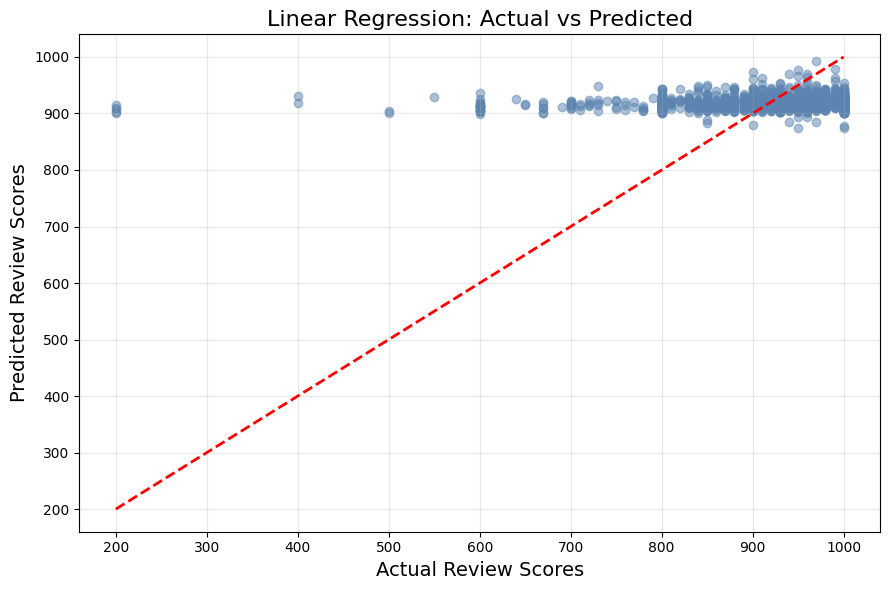

Ridge Regression Results:
Mean Squared Error: 8912.6758
R-squared Score: 0.0102
--------------------------------------------------


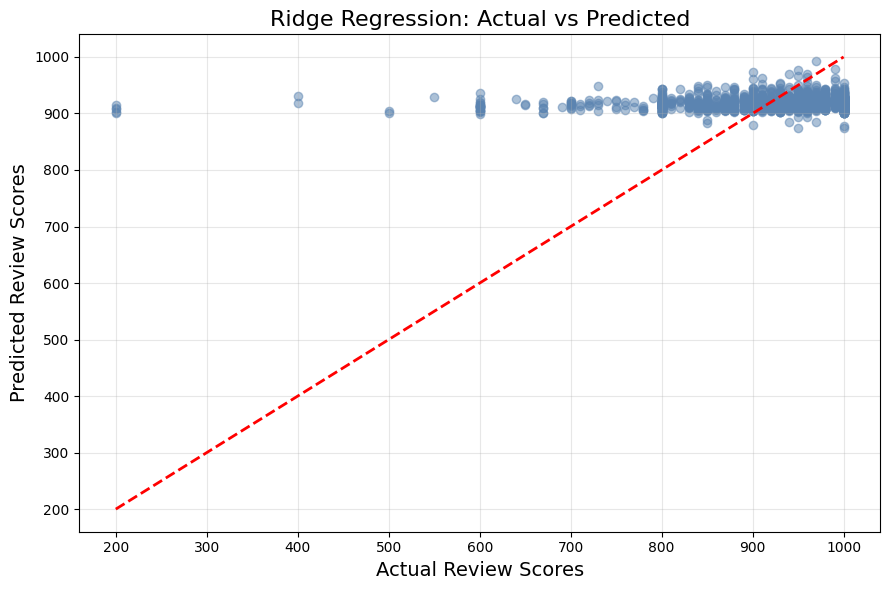

Lasso Regression Results:
Mean Squared Error: 8903.8445
R-squared Score: 0.0112
--------------------------------------------------


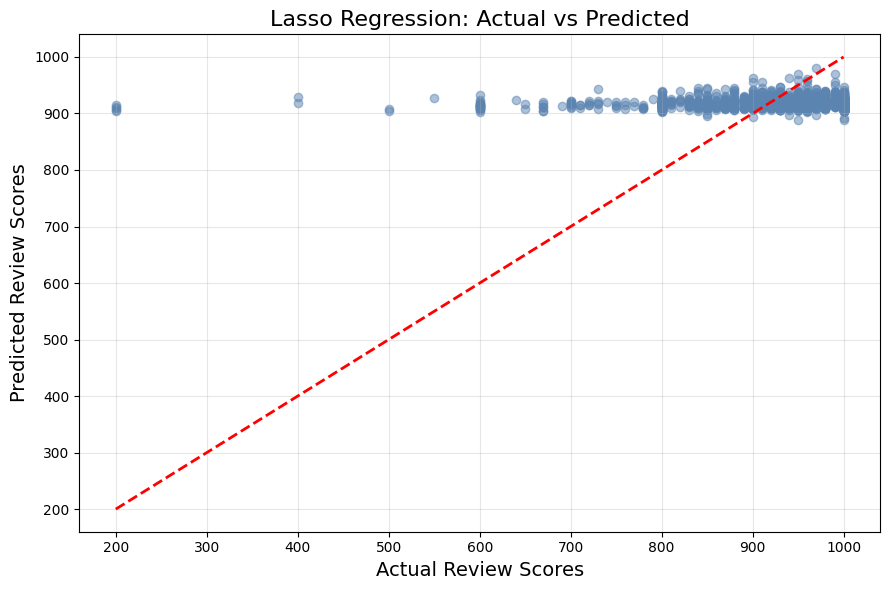

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Variables seleccionadas ---
features = [
    'price', 'number_of_reviews', 'reviews_per_month',
    'minimum_nights', 'availability_365', 'room_type'
]
target = 'review_scores_rating'

# --- 2. Copia del dataframe y preparación ---
df_model = df_clean[[*features, target]].copy()

# One-hot encoding de la variable categórica 'room_type'
df_model = pd.get_dummies(df_model, columns=['room_type'], drop_first=True)

# Eliminar registros con valores nulos en las variables seleccionadas
df_model.dropna(inplace=True)

# --- 3. Separar variables dependientes e independientes ---
X = df_model.drop(columns=[target])
y = df_model[target]

# --- 4. División entrenamiento/prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Modelos ---
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

# --- 7. Entrenamiento y evaluación ---
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'mse': mse,
        'r2': r2,
        'predictions': y_pred
    }

    print(name + ' Results:')
    print('Mean Squared Error:', round(mse, 4))
    print('R-squared Score:', round(r2, 4))
    print('-' * 50)

    # --- 8. Visualización ---
    plt.figure(figsize=(9, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='#5B84B1FF')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Review Scores', fontsize=14)
    plt.ylabel('Predicted Review Scores', fontsize=14)
    plt.title(f'{name}: Actual vs Predicted', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


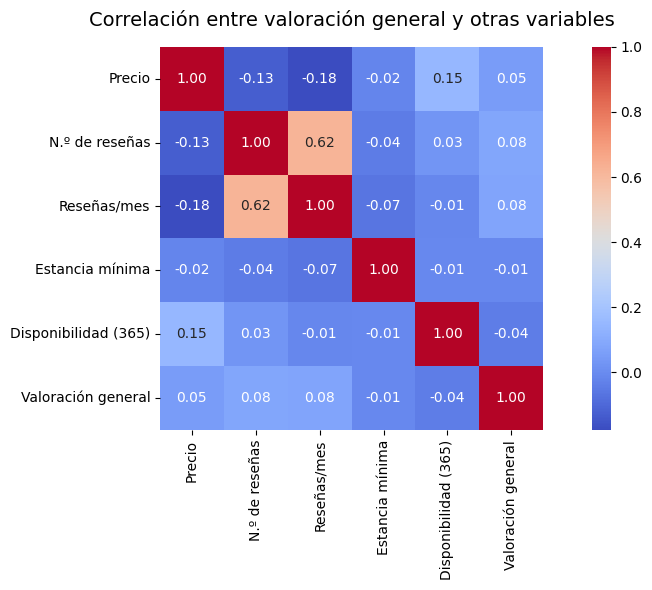

In [156]:
# Selección de variables numéricas relevantes
num_cols = [
    'price', 'number_of_reviews', 'reviews_per_month',
    'minimum_nights', 'availability_365', 'review_scores_rating'
]

# Diccionario de traducción
col_translation = {
    'price': 'Precio',
    'number_of_reviews': 'N.º de reseñas',
    'reviews_per_month': 'Reseñas/mes',
    'minimum_nights': 'Estancia mínima',
    'availability_365': 'Disponibilidad (365)',
    'review_scores_rating': 'Valoración general'
}

# Cálculo de la matriz de correlaciones
corr_matrix = df_clean[num_cols].corr(method='pearson')
corr_matrix.rename(index=col_translation, columns=col_translation, inplace=True)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlación entre valoración general y otras variables', fontsize=14, pad=15)
plt.tight_layout()
plt.show()


No vemos ninguna variable con una correlación relevante (±0,3) con la variable valoración general.

Vamos a aplicar una regresión no lineal (de árbol aleatorio) para estimar qué variables  
pueden influir de forma no lineal con nuestra variable.

Random Forest Results:
MSE: 9271.08
R²: -0.0296


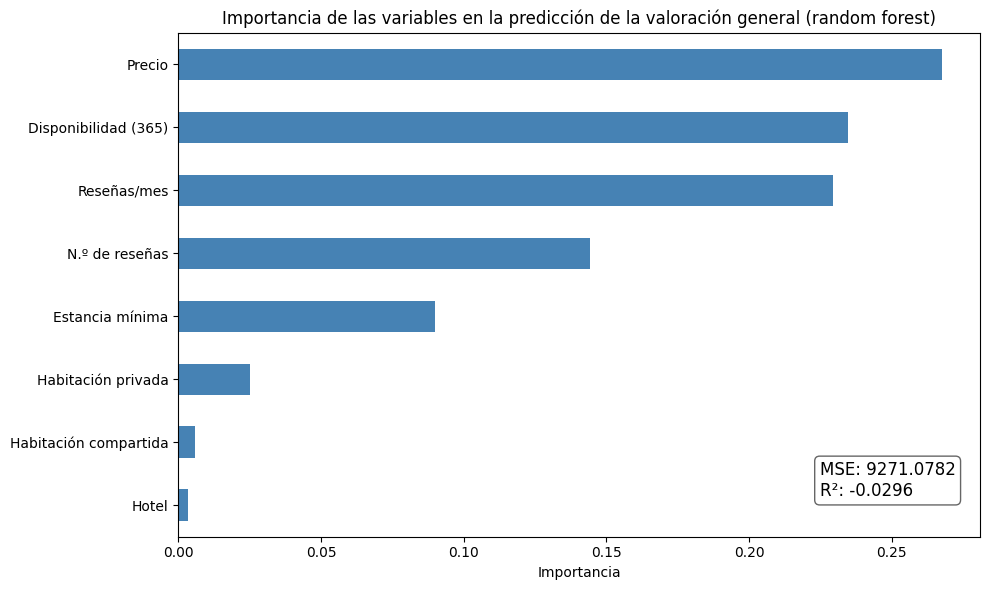

In [168]:
# Diccionario de traducción
col_translation = {
    'price': 'Precio',
    'number_of_reviews': 'N.º de reseñas',
    'reviews_per_month': 'Reseñas/mes',
    'minimum_nights': 'Estancia mínima',
    'availability_365': 'Disponibilidad (365)',
    'review_scores_rating': 'Valoración general',
    'room_type_Private room': 'Habitación privada',
    'room_type_Shared room': 'Habitación compartida',
    'room_type_Hotel room': 'Hotel'
}


# Preparación de datos (ya codificados con get_dummies antes)
X = df_model.drop(columns=['review_scores_rating'])
y = df_model['review_scores_rating']

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Results:")
print("MSE:", round(mse, 2))
print("R²:", round(r2, 4))

# Importancia de las variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_renamed = importances.rename(index=lambda x: col_translation.get(x, x))
importances_renamed.sort_values().plot(kind='barh', figsize=(10, 6), color='#4682B4')
plt.title('Importancia de las variables en la predicción de la valoración general (random forest)')

# ✅ Mostrar R² y MSE dentro del gráfico
textstr = f"MSE: {mse:.4f}\nR²: {r2:.4f}"
plt.text(
0.8, 0.15, textstr,
transform=plt.gca().transAxes,
fontsize=12,
verticalalignment='top',
bbox=dict(boxstyle='round', facecolor='white', alpha=0.6)
)
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


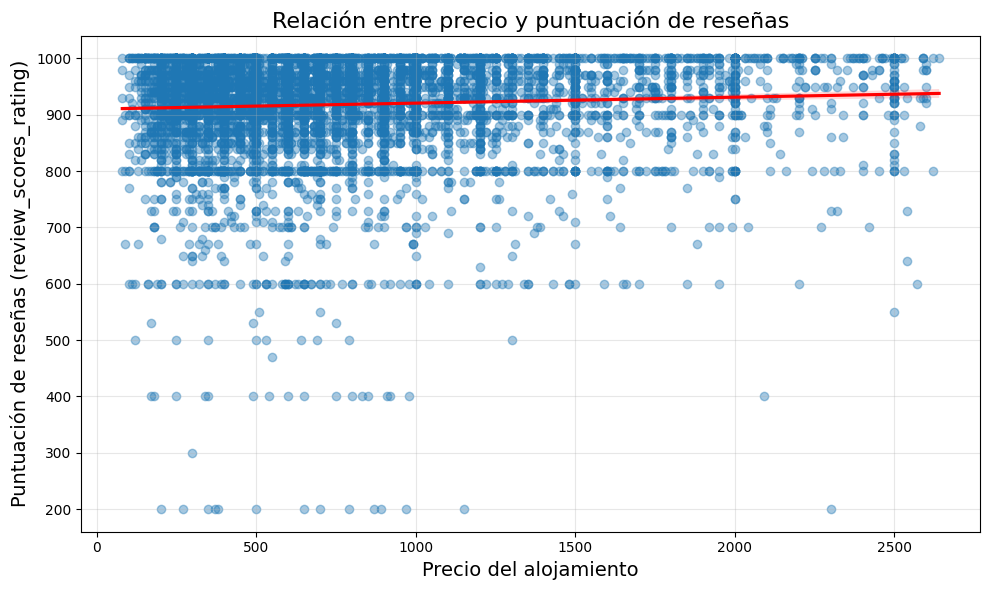

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que no haya valores nulos en las variables necesarias
df_plot = df_clean[['price', 'review_scores_rating']].dropna()

# Limitar valores extremos de precio para evitar distorsiones en la visualización
df_plot = df_plot[df_plot['price'] < df_plot['price'].quantile(0.95)]

# Crear el scatterplot con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_plot,
    x='price',
    y='review_scores_rating',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

plt.title('Relación entre precio y puntuación de reseñas', fontsize=16)
plt.xlabel('Precio del alojamiento', fontsize=14)
plt.ylabel('Puntuación de reseñas (review_scores_rating)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


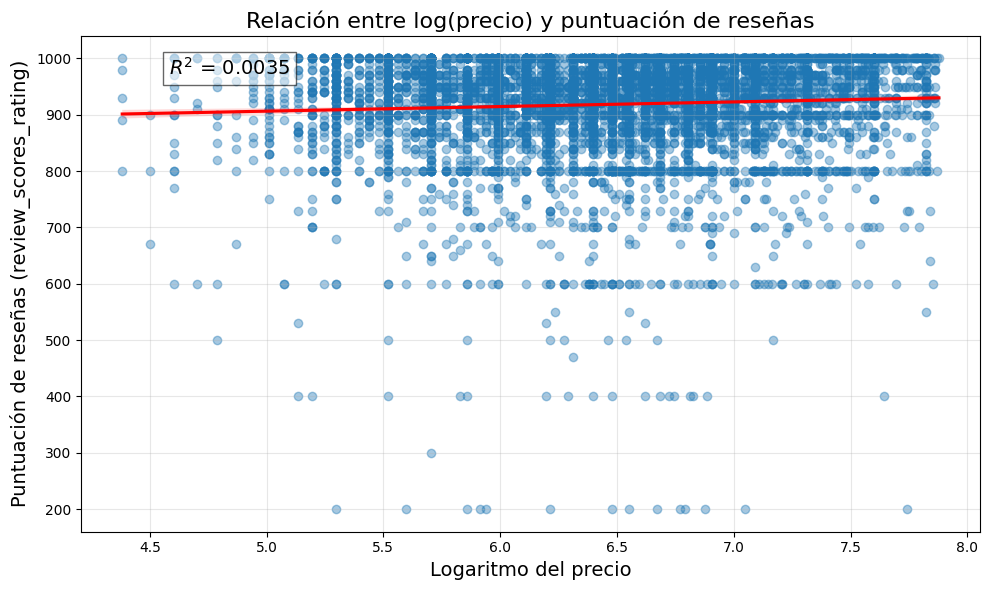

In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Preparar los datos
df_plot = df_clean[['price', 'review_scores_rating']].dropna()
df_plot = df_plot[df_plot['price'] > 0]
df_plot = df_plot[df_plot['price'] < df_plot['price'].quantile(0.95)]
df_plot['log_price'] = np.log(df_plot['price'])

# Ajustar modelo de regresión lineal para calcular R²
X = df_plot[['log_price']].values
y = df_plot['review_scores_rating'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_plot,
    x='log_price',
    y='review_scores_rating',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

# Añadir R² al gráfico
plt.text(
    x=df_plot['log_price'].min() + 0.2,
    y=df_plot['review_scores_rating'].max() - 30,
    s=f'$R^2$ = {r2:.4f}',
    fontsize=14,
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.title('Relación entre log(precio) y puntuación de reseñas', fontsize=16)
plt.xlabel('Logaritmo del precio', fontsize=14)
plt.ylabel('Puntuación de reseñas (review_scores_rating)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
